## Applied Exercises from Chapter 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#8a. import college dataset and inspect columns
college = pd.read_csv('College.csv',na_values = ['?'])
column_types = college.dtypes
column_types

In [ ]:
#8b. change the index name to the college (unique entries)
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college = college3
college

In [ ]:
#8c. use the describe function
college.describe()

In [ ]:
# practice using iloc: use brackets, use splices
college.iloc[:,0:3];   

# practice using iloc: using a list of indexes
college.iloc[:,[1,3,4]]

# practice using iloc, 
college.loc[:,['Top10perc','Apps','Enroll']]

In [ ]:
#8d. create a scatter plot of [Top10perc, Apps, Enroll]
pd.plotting.scatter_matrix(college.loc[:,['Top10perc','Apps','Enroll']]);

In [ ]:
#8e. Use boxplot to produce a plot of Outstate (numerical) by Private (categorical)
boxplot = college.boxplot(column=['Outstate'],by=['Private']);

In [ ]:
#8f. inspecting the data, the data is not given as a fraction.
print(college['Top10perc'].head())

# PD.cut, the second input specifies the bins, the third the label
college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])

print(college['Elite'])
print('\nThe number of elite colleges:\n',college.value_counts('Elite'))

boxplot_elite = college.boxplot(column='Outstate', by='Elite')

In [ ]:
# 8g, using plot.hist()
import matplotlib.pyplot as plt

# problem here is that the plot x-axis does not scale with the bin std deviation
fig, axes = plt.subplots(nrows=2, ncols=2)
college.plot.hist(ax= axes[0,0], column=['Accept'], bins=25);
college.plot.hist(ax= axes[0,1], column=['Apps'], bins=25);
college.plot.hist(ax= axes[1,0], column=['Enroll'], bins=25);
college.plot.hist(ax= axes[1,1], column=['Grad.Rate'], bins=25);

## Problem 9

In [ ]:
# read in the data, change ? into NANs
auto = pd.read_csv('Auto.csv',na_values = ['?'])
auto

In [ ]:
#9a. removing the qualitative variables, year, origin, name. Quantitative vars include mpg, cyl,displ,hp,weight,accel
auto_num = auto.iloc[:,0:7]
auto_num = auto.drop(columns=['year','origin','name'])
auto_num

In [ ]:
# checking data types are numeric
column_types = auto_num.dtypes
column_types

In [ ]:
#9b,c. get range, mean and standard deviation of each quantitative predictor
pd.DataFrame({'range': auto_num.max() - auto_num.min(),
                'mean': auto_num.mean(),
             'std': auto_num.std()})

In [ ]:
# check number of rows before dropping
auto_test = auto.index[9:84] #does index not use splice notation? shouldn't it be 9:85 to capture values at rows 9-85?
auto_test.shape

In [ ]:
#9d. drop the selected 10th through 85th observation, check new range, mean, and std deviation
auto_redac = auto_num.drop(auto.index[10:85])
pd.DataFrame({'range': auto_redac.max() - auto_redac.min(),
                'mean': auto_redac.mean(),
             'std': auto_redac.std()})

In [ ]:
#9e investigate the quantitative predictors. Use correlation matrix variables to understand relationships.
auto_num_corr = auto_num.corr()

# get upper triangular only
matrix = np.triu(auto_num_corr)

# using the upper triangle matrix as mask 
sns.heatmap(auto_num_corr, annot=True, mask=matrix);

The quantitative predictors are highly correlated with each other, with lowest correlation between acceleration and mpg. Investigating this relationship further in next cell, with a scatterplot of mpg vs. acceleration.

In [ ]:
auto_num.plot.scatter(x = 'mpg', y='acceleration');

9g. We can see from the correlation heatmap that the variables most highly correlated with mpg are cylinders, displacement, horsepower and weight. Note that these are all inversely proportional. The greater those variables are, the lower the mpg is, which makes sense.

## Problem 10

**10a.** load the Boston dataset from the ISLP library (pre-installed)

In [3]:
from ISLP import load_data
Boston = load_data("Boston")
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**10b.** we can see from the call of Boston.shape that there are 506 neighborhoods and 13 statistics per neighborhood.

In [4]:
print('size is:',Boston.shape)


size is: (506, 13)


**10c.** create pairwise scatterplots of the predictors (response not specified)

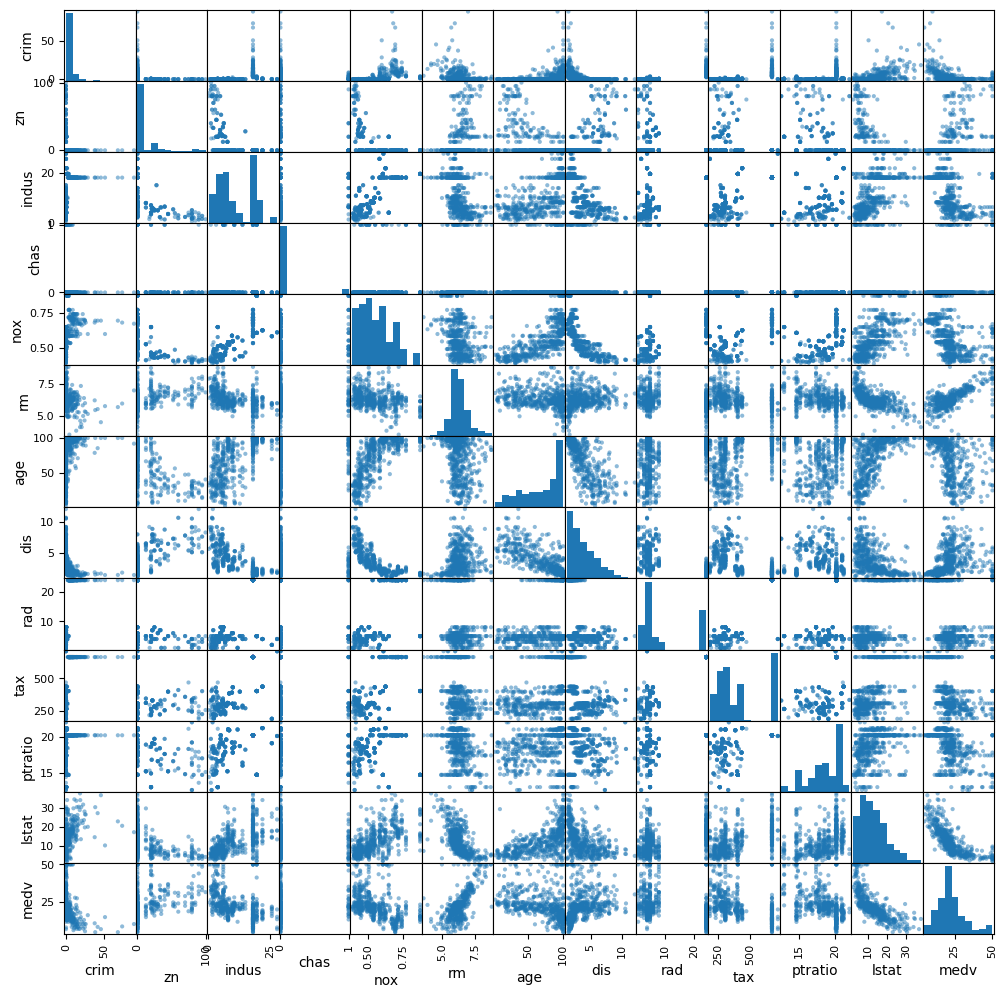

In [5]:
pd.plotting.scatter_matrix(Boston,figsize=(12,12));

**10d.** Identify predictors associated with the per capita crime rate:<br> The correlation heat map shows that the median value of homes, distance to employment centers, are most negatively correlated, and that index of accessibility and property tax are the most positively correlated. 

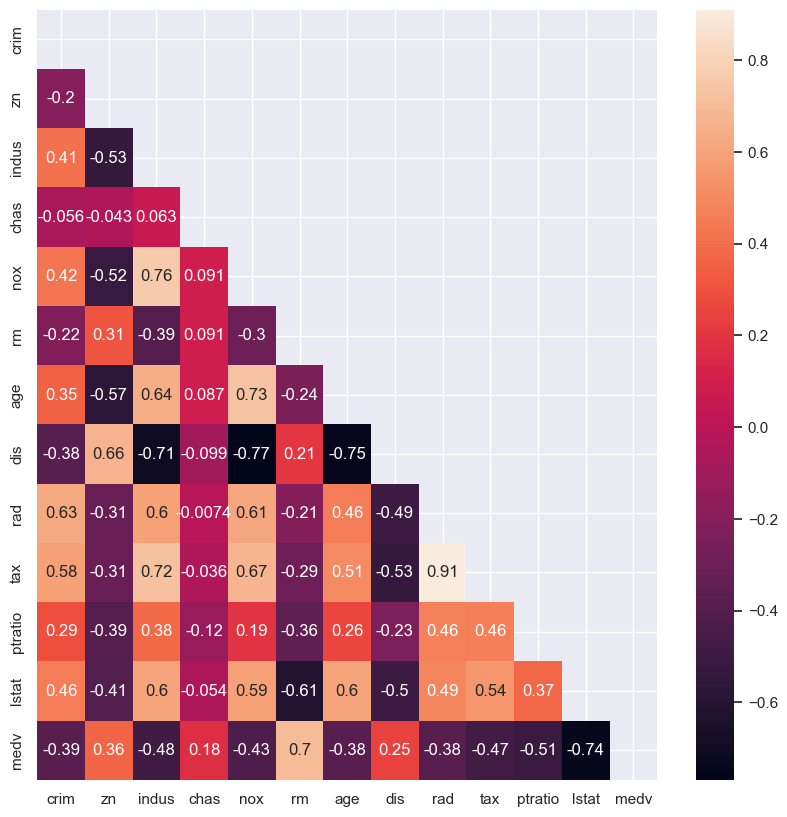

In [6]:
corr = Boston.corr()
corr_ut = np.triu(corr)
sns.set (rc = {'figure.figsize':(10, 10)}) # adjust the size of the heatmap
sns.heatmap(corr, annot=True, mask=corr_ut);

**10e.** Identify which suburbs of Boston have particularly high crime rates, tax rates, & pupil-teacher ratios:<br><br> I'm interpreting the question as asking if there are any outliers for the given predictors, which can be done with boxplots. An outlier is defined by the IQR (distance between Q3 and Q1) rule, which is defined by any datapoint that is less than Q1-IQR or or greater than Q3+IQR. We can see quite a few outliers for crime and for ptratio. In the future, we could create a list of all indexes of suburbs that are considered outliers for those two predictors.

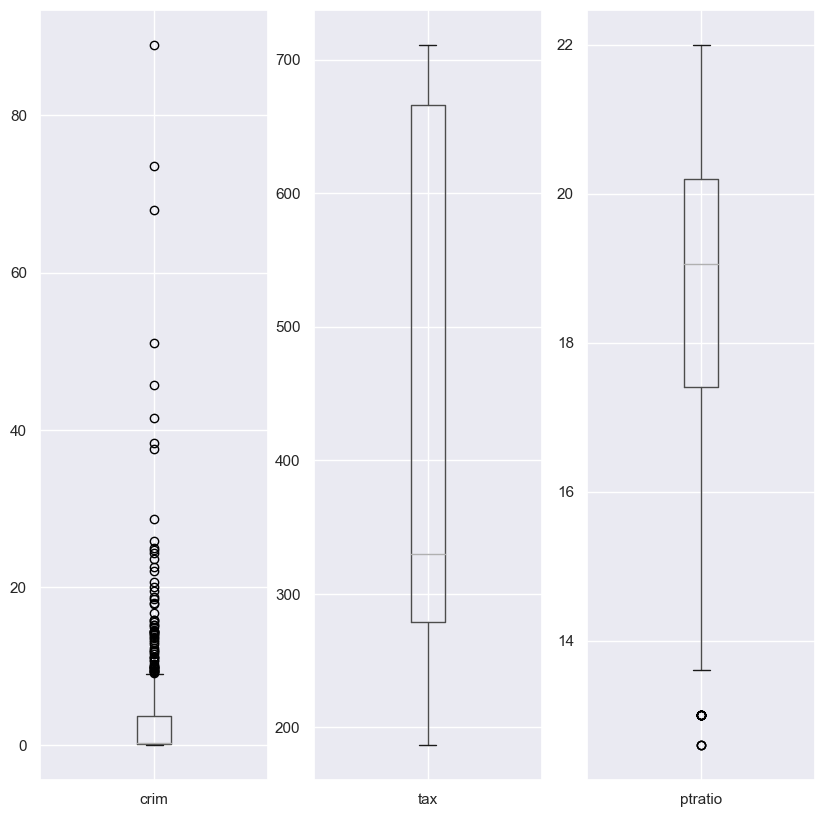

In [8]:
# create boxplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3)
Boston.boxplot(ax=axes[0],column=['crim']);
Boston.boxplot(ax=axes[1],column=['tax']);
Boston.boxplot(ax=axes[2],column=['ptratio']);


**10f.** Count the number of suburbs that are bounded by the Charles river, coded as 1 for variable chas:<br><br>We will use the sum function to count how many examples that chas=1 for. There are **35** suburbs bounded by the Charles river.

In [9]:
np.sum(Boston['chas'])

35

**10g.** What is the median pupil-teacher ratio among the suburbs?<br> <br> We use the numpy function median to calculate the median pupil teacher ratio for the Boston suburbs. The median is **19.05** students per teacher. The code below the median calculation is me trying to understand why the median was given as a float. It turns out the input data also reports student teacher ratio as a float, which makes sense as the variable is for each suburb an average, which means there are more than 1 school per suburb, in at least some cases.

In [10]:
np.median(Boston['ptratio'])

19.05

In [11]:
Boston['ptratio'].dtypes

dtype('float64')

In [12]:
Boston['ptratio'].head()

0    15.3
1    17.8
2    17.8
3    18.7
4    18.7
Name: ptratio, dtype: float64

**10h.** Which suburb has the lowest median value of owner occupied homes? Compare that suburbs to the overall ranges for the other suburb characteristics. <br> <br> The suburb with the lowest median value homes (owner occupied) had no proportion of residential land above 25,000 sq. ft, all had homes built prior to 1940, had a close distance to employment centers, on higher end for index of accessibility to radial highways.

In [30]:
# 1. get the index of lowest median value owner occupied home
idx_medv = np.argmin(Boston['medv'])

# 2. show the range for each characteristic in dataset
print(pd.DataFrame({'max': Boston.max(),
              'min': Boston.min()}))

# 3. show the values for the suburb with the lowest median value owner occupied home 
Boston.loc[idx_medv]

              max        min
crim      88.9762    0.00632
zn       100.0000    0.00000
indus     27.7400    0.46000
chas       1.0000    0.00000
nox        0.8710    0.38500
rm         8.7800    3.56100
age      100.0000    2.90000
dis       12.1265    1.12960
rad       24.0000    1.00000
tax      711.0000  187.00000
ptratio   22.0000   12.60000
lstat     37.9700    1.73000
medv      50.0000    5.00000


crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

**10i.** How many suburbs average more than seven rooms per dwelling?

In [38]:
print('number of suburbs with more than 7 rooms per dwelling: ', np.sum(Boston['rm']>7))
print('number of suburbs with more than 7 rooms per dwelling: ', np.sum(Boston['rm']>8))

number of suburbs with more than 7 rooms per dwelling:  64
number of suburbs with more than 7 rooms per dwelling:  13


Future work could be to plot the suburb data or highlight the high room count suburbs against the boxplots for each predictor.